## Fashion MNIST : CNN 과 Callback 구현

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

print(tf.__version__)

2.17.0


In [2]:
# loading Fashion MNIST data
# 설명 :  https://www.tensorflow.org/tutorials/keras/classification
# 소스 :  https://github.com/tensorflow/docs-l10n/tree/master/site/ko/tutorials/keras

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(28, 28)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4]


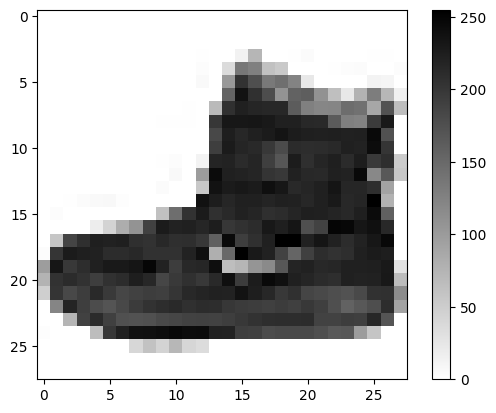

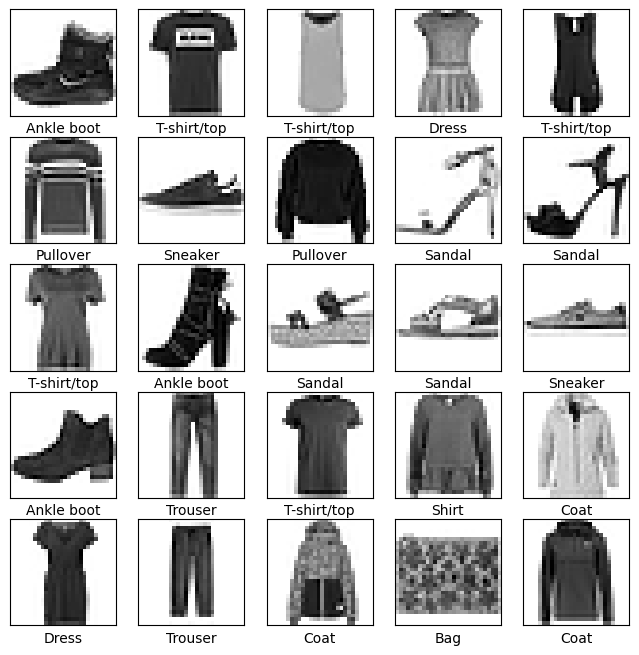

In [3]:
# 이미지 데이터 정보 및 시각화
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(x_train.shape,y_train.shape)  # (60000, 28, 28) (60000,)
print(x_test.shape,y_test.shape)    # (10000, 28, 28) (10000,)
print(x_train[0].shape)             # (28, 28)
# print(x_train[0])
print(y_train[:30])

plt.imshow(x_train[0],cmap=plt.cm.binary)
# plt.imshow(x_train[0],cmap='gray')
plt.colorbar()

plt.figure(figsize=(8,8))         # 그래프 사이즈의 크기 설정, width,height, default:[6.4,4.8]
for k in range(25):
    plt.subplot(5,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[k],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[k]])

plt.show()

In [4]:
# 이미지 정규화(normalization) :  0 to 255 ==> 0 to 1
x_train  = x_train / 255.0
x_test = x_test / 255.0
# print(x_train[0])

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)


In [5]:
# 정규화 함수 직접 구현할 경우(여기서는 불필요)
# Z = (X-min())/(max()-min())
def normalizer(data):
    result = (data - np.min(data,axis=0))/(np.max(data,axis=0) - np.min(data,axis=0))
    return result

# print(np.min(x_train,axis=0))   # 0  ...
# print(np.max(x_train,axis=0))   # 255 ...
# x_train = normalizer(x_train)
# x_test = nomalizer(x_test)

In [6]:
# CNN 을 사용하지 않은 모델
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 학습 및 평가
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)  # 0.8776999711990356

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7806 - loss: 0.6277
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8597 - loss: 0.3884
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8752 - loss: 0.3371
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8851 - loss: 0.3147
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8913 - loss: 0.2927
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8990 - loss: 0.2774
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9031 - loss: 0.2629
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9051 - loss: 0.2584
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9084 - loss: 0.2452
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9107 - loss: 0.2402
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.3365


[0.3369629383087158, 0.8878999948501587]

In [7]:
# CNN 사용 모델
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 학습  : 약 4분 (colab)
history = model.fit(x_train, y_train, epochs=5)
# history = model.fit(x_train, y_train, epochs=10)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8112 - loss: 0.5262
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9016 - loss: 0.2710
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9184 - loss: 0.2199
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 0.9318 - loss: 0.1854
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 19ms/step - accuracy: 0.9414 - loss: 0.1566


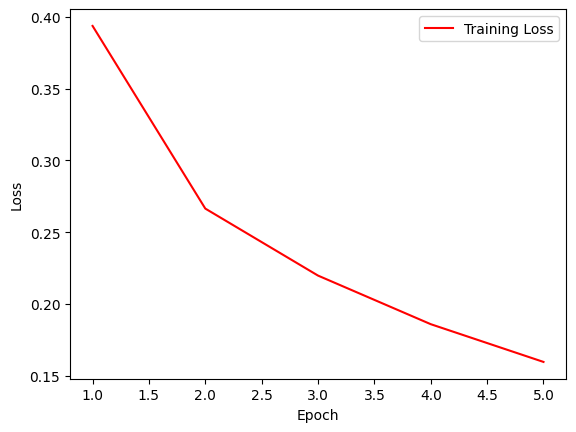

In [9]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
# 평가
model.evaluate(x_test, y_test)  # 0.9096999764442444

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9065 - loss: 0.2638


[0.249329075217247, 0.9115999937057495]

In [11]:
# 예측
preds = model.predict(x_test)
print(preds[0])
print(y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[1.0560444e-06 2.6439292e-08 6.8276199e-07 3.8747464e-07 3.6986245e-07
 5.2243849e-05 7.9999424e-08 4.9864576e-04 9.2989829e-08 9.9944627e-01]
9


### [2] Callback  사용 학습 모델  구현 : Fashion MNIST

In [18]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# 학습 : 약 2분 (colab)
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8153 - loss: 0.5260
Epoch 2/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9013 - loss: 0.2716
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9013 - loss: 0.2715


In [20]:
# 평가
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8909 - loss: 0.3033


[0.2971413731575012, 0.8917999863624573]